In [1]:
import numpy as np
import pandas as pd
import re
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
# load data
df_period1 = pd.read_excel('2011_data.xlsx')
df_period2 = pd.read_excel('2012-2019_data.xlsx')
df_period3 = pd.read_excel('2020-2023_data.xlsx')

In [2]:
# Data preprocessing
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def preprocess(text):
    tokens = word_tokenize(text.lower())  # Lower case and divide words
    tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
    return tokens

import re
from nltk.corpus import stopwords

def filter_text(text):    
    # Remove parentheses and their contents
    text = re.sub(r'\([^)]*\)', '', text)
    # Remove all symbols and numbers
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Tokenize the text by splitting into words
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words into a single string
    return ' '.join(filtered_words)

In [3]:
df_period1['Abstract'] = df_period1['Abstract'].astype(str).dropna()
df_period2['Abstract'] = df_period2['Abstract'].astype(str).dropna()
df_period3['Abstract'] = df_period3['Abstract'].astype(str).dropna()

# Filter the text in the 'Abstract' column
df_period1['Abstract'] = [filter_text(item) for item in df_period1['Abstract']]
df_period2['Abstract'] = [filter_text(item) for item in df_period2['Abstract']]
df_period3['Abstract'] = [filter_text(item) for item in df_period3['Abstract']]

documents_period1 = [preprocess(doc) for doc in df_period1['Abstract'].tolist()]
documents_period2 = [preprocess(doc) for doc in df_period2['Abstract'].tolist()]
documents_period3 = [preprocess(doc) for doc in df_period3['Abstract'].tolist()]

# Create dictionary
dictionary = corpora.Dictionary(documents_period1 + documents_period2 + documents_period3)

# Convert documents to a bag of Words model (BOW)
corpus_period1 = [dictionary.doc2bow(doc) for doc in documents_period1]
corpus_period2 = [dictionary.doc2bow(doc) for doc in documents_period2]
corpus_period3 = [dictionary.doc2bow(doc) for doc in documents_period3]

In [4]:
# Set the number of topics per cycle
num_topics_period1 = 2

# train LDA model
lda_model_period1 = gensim.models.ldamodel.LdaModel(corpus_period1, num_topics=num_topics_period1, id2word=dictionary, passes=500, random_state=42)

In [5]:
# print each topic and its keywords
topics = lda_model_period1.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.020*"pbat" + 0.008*"pla" + 0.008*"properties" + 0.007*"poly" + 0.007*"blends" + 0.005*"mechanical" + 0.004*"tensile" + 0.004*"biodegradable" + 0.004*"using" + 0.004*"blend"')
(1, '0.008*"association" + 0.005*"gene" + 0.005*"snps" + 0.004*"based" + 0.004*"analysis" + 0.004*"family" + 0.003*"pbat" + 0.003*"test" + 0.003*"polymorphisms" + 0.003*"rs"')


In [6]:
num_topics_period2 = 3

lda_model_period2 = gensim.models.ldamodel.LdaModel(corpus_period2, num_topics=num_topics_period2, id2word=dictionary, passes=500, random_state=42)

In [7]:
# print each topic and its keywords
topics = lda_model_period2.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.027*"pbat" + 0.015*"pla" + 0.013*"properties" + 0.013*"poly" + 0.010*"blends" + 0.009*"films" + 0.008*"mechanical" + 0.007*"blend" + 0.006*"thermal" + 0.006*"strength"')
(1, '0.004*"scaffolds" + 0.003*"bone" + 0.003*"raman" + 0.002*"using" + 0.002*"results" + 0.002*"ppy" + 0.002*"based" + 0.002*"dna" + 0.002*"pbat" + 0.002*"variants"')
(2, '0.009*"biodegradable" + 0.006*"films" + 0.005*"soil" + 0.005*"pbat" + 0.004*"uv" + 0.003*"plastics" + 0.003*"degradation" + 0.003*"used" + 0.003*"p" + 0.003*"biodegradation"')


In [8]:
num_topics_period3 = 5

lda_model_period3 = gensim.models.ldamodel.LdaModel(corpus_period3, num_topics=num_topics_period3, id2word=dictionary, passes=500, random_state=42)

In [9]:
# print each topic and its keywords
topics = lda_model_period3.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.039*"pbat" + 0.019*"pla" + 0.016*"properties" + 0.011*"mechanical" + 0.011*"poly" + 0.011*"blends" + 0.009*"composites" + 0.009*"strength" + 0.008*"blend" + 0.007*"films"')
(1, '0.031*"films" + 0.021*"film" + 0.017*"packaging" + 0.012*"food" + 0.011*"pbat" + 0.009*"properties" + 0.007*"antimicrobial" + 0.007*"antibacterial" + 0.007*"starch" + 0.007*"water"')
(2, '0.013*"pbat" + 0.009*"biodegradable" + 0.008*"properties" + 0.007*"poly" + 0.007*"based" + 0.007*"high" + 0.006*"performance" + 0.005*"mechanical" + 0.005*"materials" + 0.004*"foam"')
(3, '0.019*"degradation" + 0.014*"pbat" + 0.009*"plastic" + 0.009*"plastics" + 0.008*"biodegradable" + 0.006*"acid" + 0.006*"study" + 0.006*"biodegradation" + 0.005*"conditions" + 0.005*"c"')
(4, '0.027*"soil" + 0.020*"mps" + 0.017*"pbat" + 0.013*"biodegradable" + 0.011*"mulch" + 0.011*"microplastics" + 0.008*"pe" + 0.007*"effects" + 0.006*"film" + 0.006*"study"')


In [10]:
# Gets the probability matrix of terms in subtopics
def get_term_topic_probabilities(lda_model, dictionary, num_topics):
    term_topic_probabilities = defaultdict(lambda: defaultdict(float))
    for word_id, word in dictionary.items():
        for topic_id in range(num_topics):
            # Gets the term probability in the topic
            term_probability = lda_model.get_term_topics(word_id, minimum_probability=0)
            for topic_prob in term_probability:
                term_topic_probabilities[word][topic_prob[0]] = topic_prob[1]
    return term_topic_probabilities

term_topic_probs_period1 = get_term_topic_probabilities(lda_model_period1, dictionary, num_topics_period1)
term_topic_probs_period2 = get_term_topic_probabilities(lda_model_period2, dictionary, num_topics_period2)
term_topic_probs_period3 = get_term_topic_probabilities(lda_model_period3, dictionary, num_topics_period3)

# Calculate the Euclidean distance between two subtopics
def calculate_euclidean_distance(topic1_probs, topic2_probs):
    # Gets all the terms that occur
    all_terms = set(topic1_probs.keys()).union(set(topic2_probs.keys()))

    # Initializes the probability of the term in two subtopics
    topic1_vector = []
    topic2_vector = []

    for term in all_terms:
        # If the term does not appear in a topic, the probability is set to 0
        prob_topic1 = topic1_probs.get(term, 0)
        prob_topic2 = topic2_probs.get(term, 0)

        # Build two vectors
        topic1_vector.append(prob_topic1)
        topic2_vector.append(prob_topic2)

    # Calculate Euclidean distance
    distance = np.sqrt(np.sum((np.array(topic1_vector) - np.array(topic2_vector))**2))
    return distance

# Calculate the distance matrix between period 1 and period 2
def calculate_distance_matrix(term_topic_probs_period1, term_topic_probs_period2, num_topics1, num_topics2):
    distance_matrix = np.zeros((num_topics1, num_topics2))

    for i in range(num_topics1):
        for j in range(num_topics2):
            # Gets the probability distribution for the I-th topic of period 1 and the JTH topic of period 2
            topic1_probs = {term: prob[i] for term, prob in term_topic_probs_period1.items()}
            topic2_probs = {term: prob[j] for term, prob in term_topic_probs_period2.items()}
            # Calculate the distance between two subjects
            distance_matrix[i, j] = calculate_euclidean_distance(topic1_probs, topic2_probs)

    return distance_matrix

In [11]:
distance_matrix_1_2 = calculate_distance_matrix(term_topic_probs_period1, term_topic_probs_period2, num_topics_period1, num_topics_period2)
distance_matrix_1_2

array([[0.0224682 , 0.03361329, 0.03202274],
       [0.05096134, 0.0203294 , 0.02615697]])

In [12]:
distance_matrix_2_3 = calculate_distance_matrix(term_topic_probs_period2, term_topic_probs_period3, num_topics_period2, num_topics_period3)
distance_matrix_2_3

array([[0.01932162, 0.05248663, 0.03900236, 0.04618912, 0.05854389],
       [0.06168793, 0.05615138, 0.03440135, 0.03836788, 0.05336321],
       [0.05875563, 0.05013828, 0.03016701, 0.03081743, 0.0448887 ]])

In [21]:
pd.DataFrame(distance_matrix_1_2).to_csv('distance_matrix_1_2.csv')
pd.DataFrame(distance_matrix_2_3).to_csv('distance_matrix_2_3.csv')

In [13]:
# heatmap
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

def plot_distance_matrix(distance_matrix, period1, period2):
    plt.figure(figsize=(8, 6))
    sns.heatmap(distance_matrix, annot=True, cmap="YlGnBu", xticklabels=[f"L{period2} - {j+1}" for j in range(distance_matrix.shape[1])],
                yticklabels=[f"L{period1} - {i+1}" for i in range(distance_matrix.shape[0])])
    plt.title(f"Distances of two subtopics between Period {period1} and Period {period2}")
    #plt.xlabel(f"Period {period2} Topics")
    #plt.ylabel(f"Period {period1} Topics")
    plt.savefig(f'Distances of two subtopics between Period {period1} and Period {period2}.png', dpi=1000)
    plt.show()

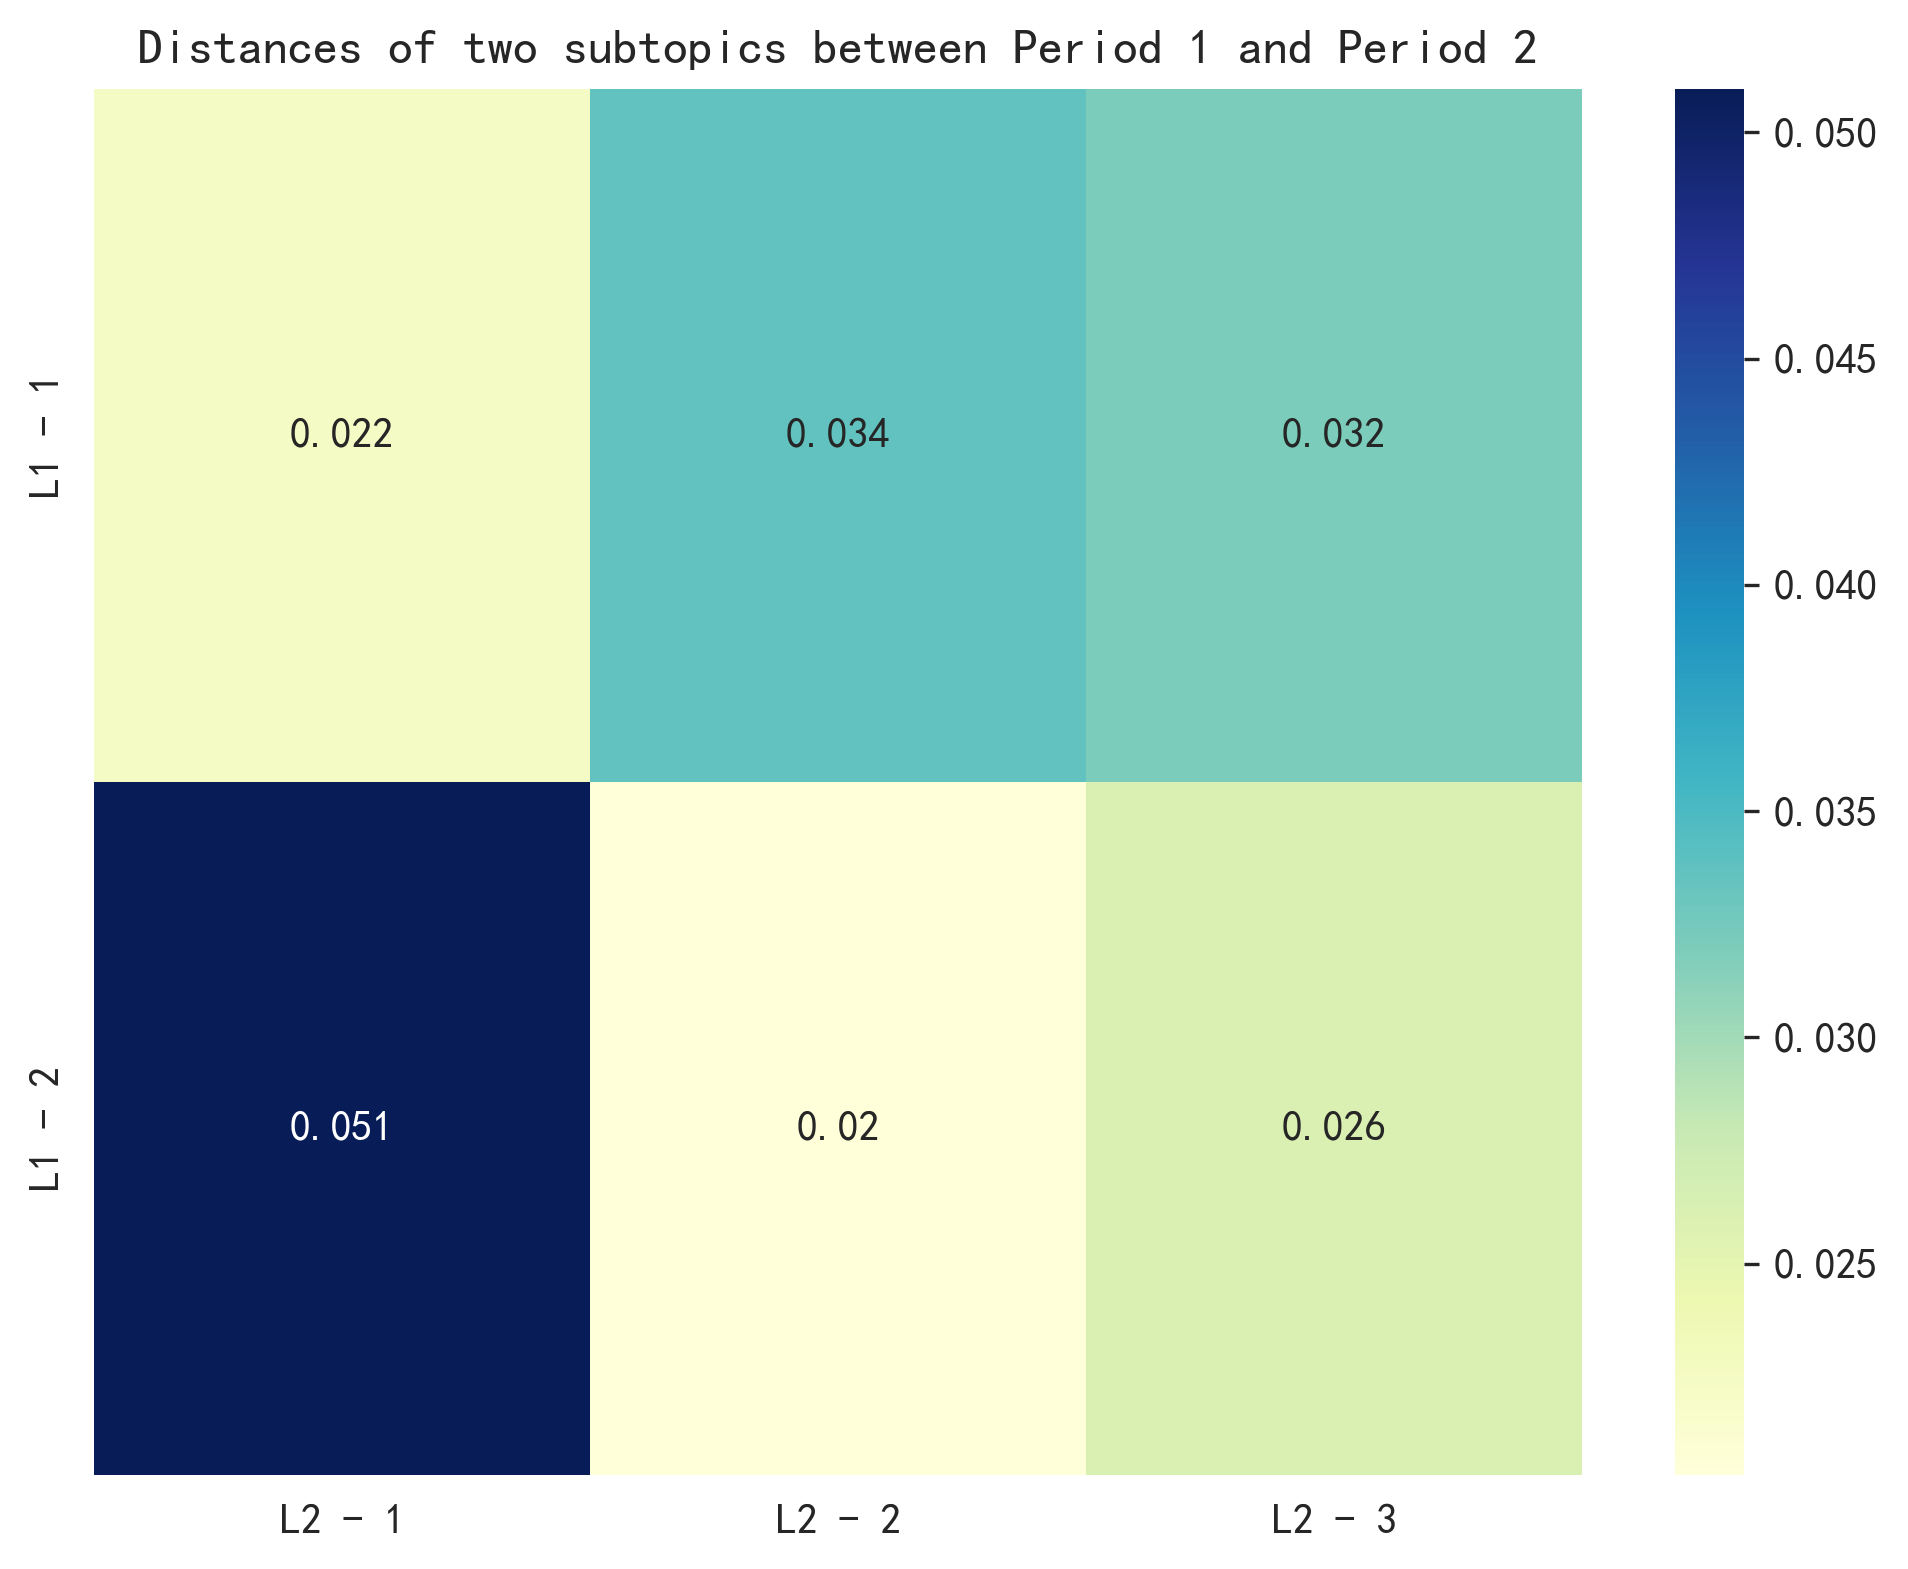

In [14]:
plot_distance_matrix(distance_matrix_1_2, 1, 2)

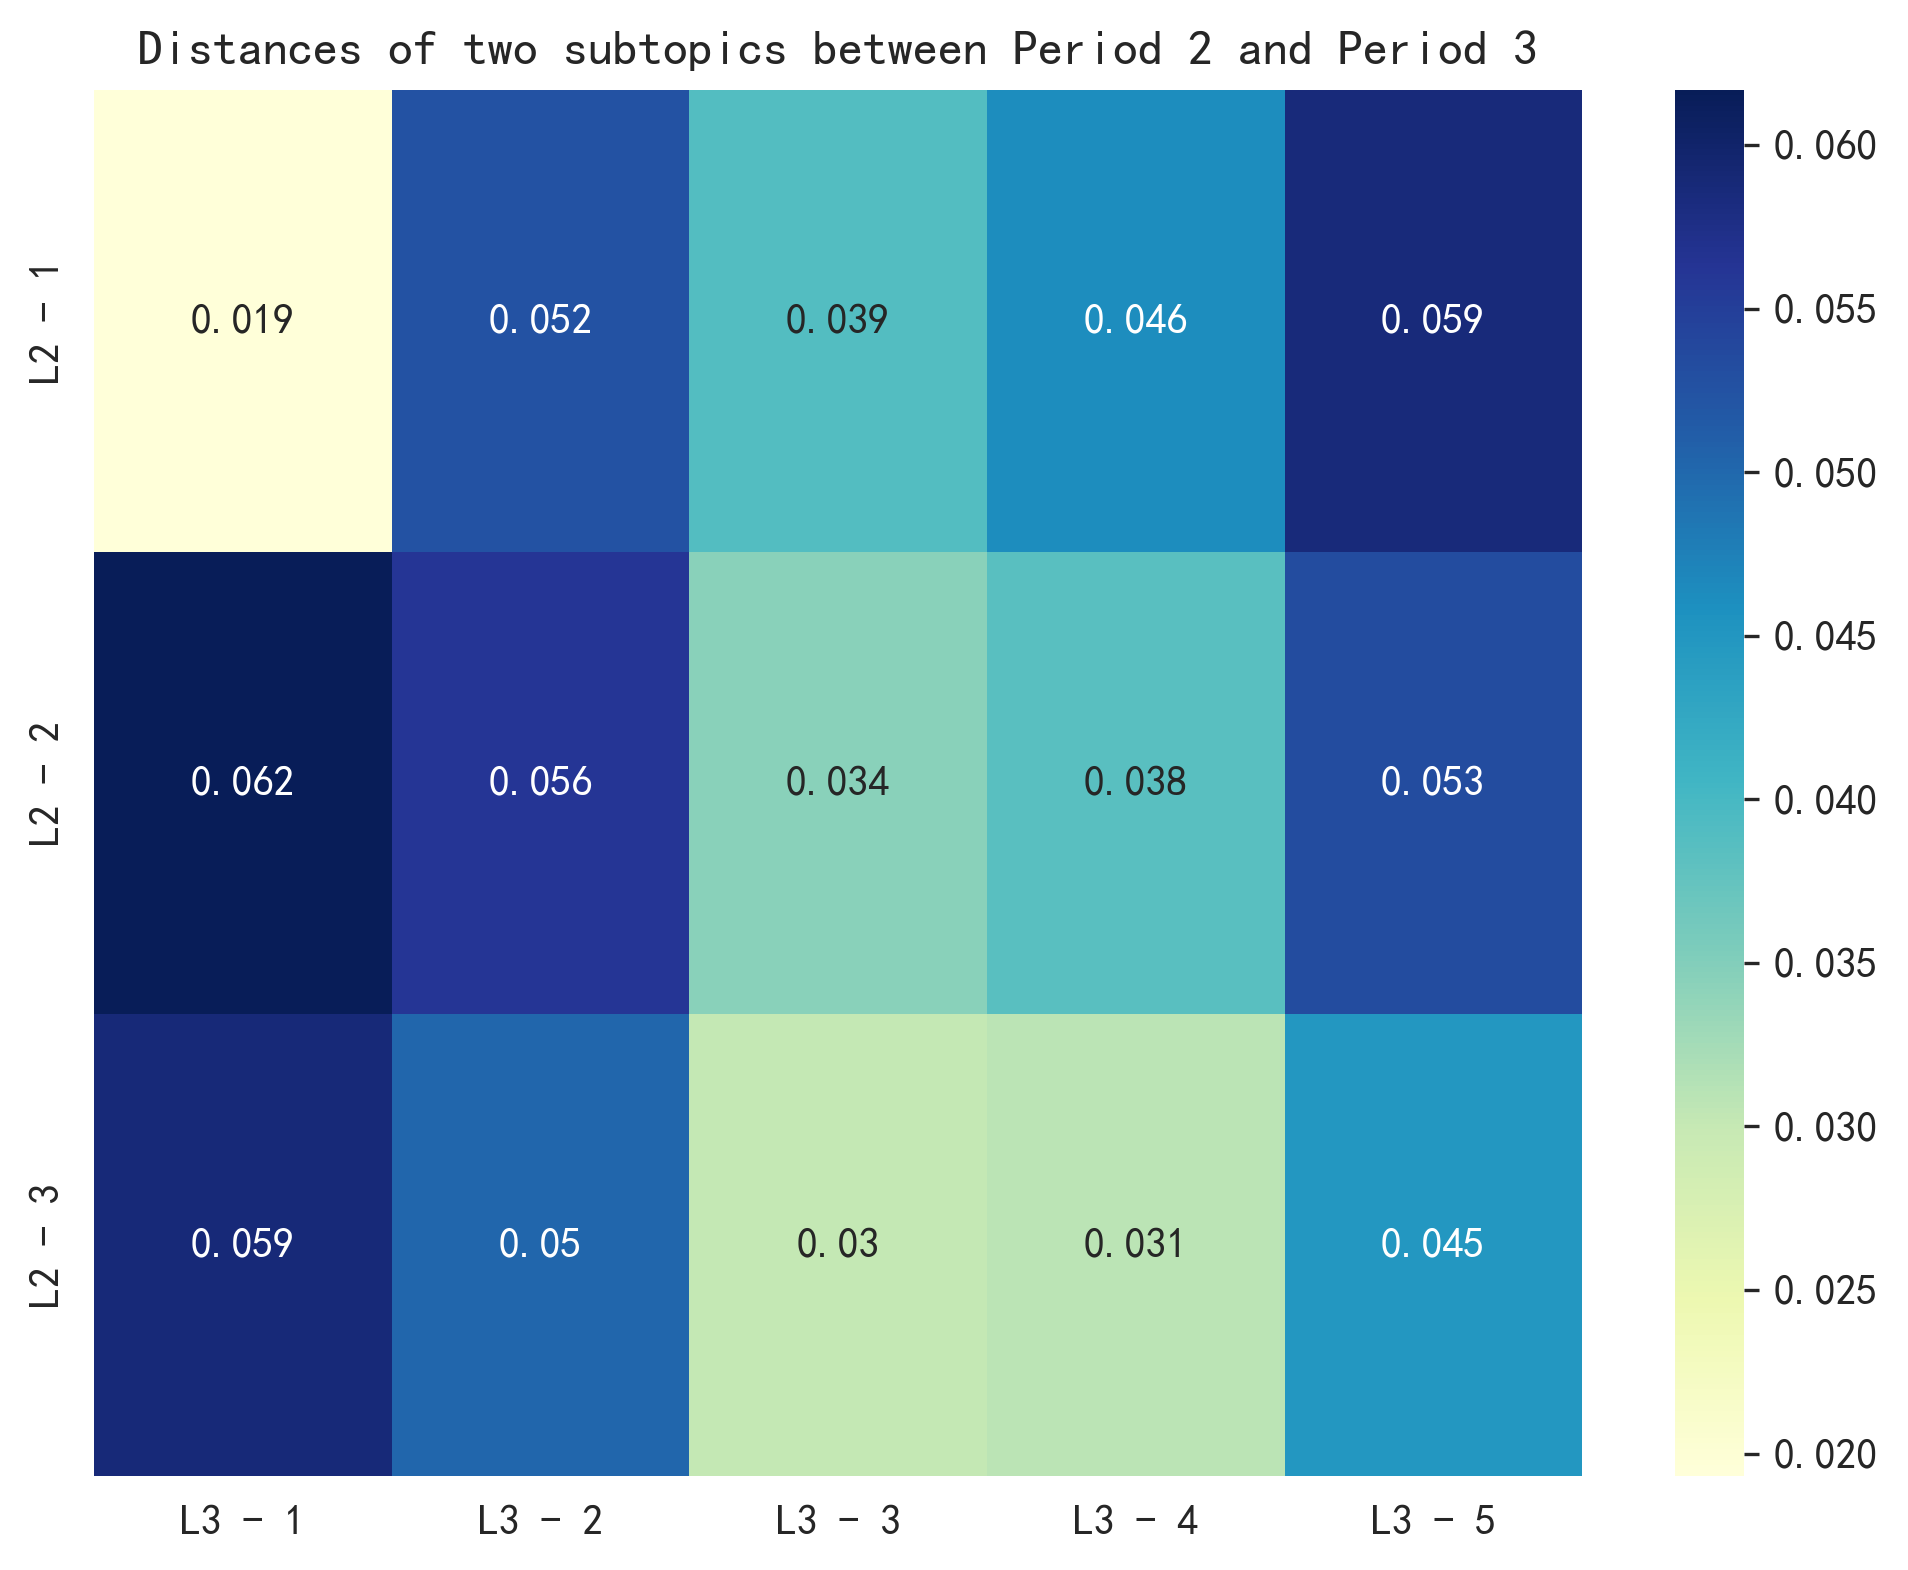

In [15]:
plot_distance_matrix(distance_matrix_2_3, 2, 3)

In [16]:
period1_file = 'TAC_1900_2011.xlsx'
period2_file = 'TAC_2012_2019.xlsx'
period3_file = 'TAC_2020_2023_new.xlsx'

In [17]:
import pandas as pd
import re
from nltk.corpus import stopwords
from collections import defaultdict
from gensim import corpora

# filter text
def filter_text(text):    
    text = re.sub(r'\([^)]*\)', '', text)  # Remove parentheses and their contents
    pattern = re.compile(r'[^a-zA-Z\s]')
    text = pattern.sub(' ', text)  # Remove all symbols and numbers
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(filtered_words)

# Divide words and remove stops
def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]
    return tokens

# Read and preprocess patent data
def process_patent_data(file_path):
    df_patent = pd.read_excel(file_path)
    df_patent['摘要 (英文)'] = df_patent['摘要 (英文)'].astype(str)
    df_patent['摘要 (英文)'] = [filter_text(item) for item in df_patent['摘要 (英文)']]
    patent_documents = [preprocess(doc) for doc in df_patent['摘要 (英文)'].tolist()]
    return patent_documents

# Get patent data for each cycle
patent_documents_period1 = process_patent_data(period1_file)
patent_documents_period2 = process_patent_data(period2_file)
patent_documents_period3 = process_patent_data(period3_file)

patent_corpus_period1 = [dictionary.doc2bow(doc) for doc in patent_documents_period1]
patent_corpus_period2 = [dictionary.doc2bow(doc) for doc in patent_documents_period2]
patent_corpus_period3 = [dictionary.doc2bow(doc) for doc in patent_documents_period3]

# Gets the probability distribution of terms in subtopics
def get_term_topic_probabilities(lda_model, dictionary, num_topics):
    term_topic_probabilities = defaultdict(lambda: defaultdict(float))
    for word_id, word in dictionary.items():
        for topic_id in range(num_topics):
            term_probability = lda_model.get_term_topics(word_id, minimum_probability=0)
            for topic_prob in term_probability:
                term_topic_probabilities[word][topic_prob[0]] = topic_prob[1]
    return term_topic_probabilities

# Calculate how often each term appears in the patent document
def calculate_term_frequencies(patent_documents):
    term_frequencies = defaultdict(int)
    for doc in patent_documents:
        for term in doc:
            term_frequencies[term] += 1
    return term_frequencies

# Term frequency of obtaining patents
term_frequencies_period1 = calculate_term_frequencies(patent_documents_period1)
term_frequencies_period2 = calculate_term_frequencies(patent_documents_period2)
term_frequencies_period3 = calculate_term_frequencies(patent_documents_period3)

# Calculate the coupling strength of the subtopic
def calculate_coupling_strength(term_topic_probabilities, term_frequencies_in_patents, num_topics):
    coupling_strengths = defaultdict(float)
    for topic_id in range(num_topics):
        cs = 0
        for term, prob in term_topic_probabilities.items():
            p_j_omega = prob[topic_id]  # The probability of the term in topic j
            m_omega = term_frequencies_in_patents.get(term, 0)  # How often the term appears in a patent
            cs += p_j_omega * m_omega
        coupling_strengths[topic_id] = cs
    return coupling_strengths

# Use your previous lda_model to calculate the coupling strength for each period
term_topic_probabilities_period1 = get_term_topic_probabilities(lda_model_period1, dictionary, num_topics_period1)
term_topic_probabilities_period2 = get_term_topic_probabilities(lda_model_period2, dictionary, num_topics_period2)
term_topic_probabilities_period3 = get_term_topic_probabilities(lda_model_period3, dictionary, num_topics_period3)

# Calculate the coupling strength for each cycle
coupling_strength_period1 = calculate_coupling_strength(term_topic_probabilities_period1, term_frequencies_period1, num_topics_period1)
coupling_strength_period2 = calculate_coupling_strength(term_topic_probabilities_period2, term_frequencies_period2, num_topics_period2)
coupling_strength_period3 = calculate_coupling_strength(term_topic_probabilities_period3, term_frequencies_period3, num_topics_period3)

# Output the coupling strength for each cycle
print("Coupling Strength for Period 1:", coupling_strength_period1)
print("Coupling Strength for Period 2:", coupling_strength_period2)
print("Coupling Strength for Period 3:", coupling_strength_period3)

Coupling Strength for Period 1: defaultdict(<class 'float'>, {0: 1.861096567583445, 1: 0.4443858901331623})
Coupling Strength for Period 2: defaultdict(<class 'float'>, {0: 18.255907352066117, 1: 3.586590539446206, 2: 10.181555857884177})
Coupling Strength for Period 3: defaultdict(<class 'float'>, {0: 12.596268721970894, 1: 10.443099747894692, 2: 10.022023996744537, 3: 9.537143073254171, 4: 7.656824890102115})


In [18]:
# Set the number of topics per cycle
num_topics_period1 = 2

# train LDA model
lda_model_period1_patent = gensim.models.ldamodel.LdaModel(patent_corpus_period1, num_topics=num_topics_period1, id2word=dictionary, passes=500, random_state=42)
# print each topic and its keywords
topics = lda_model_period1.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.020*"pbat" + 0.008*"pla" + 0.008*"properties" + 0.007*"poly" + 0.007*"blends" + 0.005*"mechanical" + 0.004*"tensile" + 0.004*"biodegradable" + 0.004*"using" + 0.004*"blend"')
(1, '0.008*"association" + 0.005*"gene" + 0.005*"snps" + 0.004*"based" + 0.004*"analysis" + 0.004*"family" + 0.003*"pbat" + 0.003*"test" + 0.003*"polymorphisms" + 0.003*"rs"')


In [32]:
from collections import defaultdict

def calculate_coupling_velocity(term_topic_probs_period, term_frequencies_in_patents_period, num_topics, num_periods):
    # Initialize the coupling velocity dictionary
    coupling_velocity = defaultdict(float)
    
    # Calculate for each topic
    for topic_id in range(num_topics):
        cv = 0  # Initialize coupling velocity to 0
        
        # Iterate over the probability distribution of each term
        for term, prob in term_topic_probs_period.items():
            p_j_omega = prob[topic_id]  # Probability of the term in topic j

            # Iterate through periods and calculate the weighted frequency of the term in each period
            for t in range(1, num_periods + 1):
                m_t_omega = term_frequencies_in_patents_period[t - 1].get(term, 0)
                cv += p_j_omega * m_t_omega * (1 / 2) ** (t - 1)
        
        # Save the coupling velocity for the current topic
        coupling_velocity[topic_id] = cv
    
    return coupling_velocity

# Count term frequencies for each period
term_frequencies_in_patents_period1 = defaultdict(int)
term_frequencies_in_patents_period2 = defaultdict(int)
term_frequencies_in_patents_period3 = defaultdict(int)

for doc in patent_documents_period1:
    for term in doc:
        term_frequencies_in_patents_period1[term] += 1

for doc in patent_documents_period2:
    for term in doc:
        term_frequencies_in_patents_period2[term] += 1

for doc in patent_documents_period3:
    for term in doc:
        term_frequencies_in_patents_period3[term] += 1

# Combine term frequencies from all periods into a list
term_frequencies_in_patents = [term_frequencies_in_patents_period1, term_frequencies_in_patents_period2, term_frequencies_in_patents_period3]

# Calculate coupling velocity for each period
coupling_velocity_period1 = calculate_coupling_velocity(term_topic_probs_period1, term_frequencies_in_patents, num_topics_period1, num_periods=3)
print("Coupling Velocity for Period 1:", coupling_velocity_period1)

coupling_velocity_period2 = calculate_coupling_velocity(term_topic_probs_period2, term_frequencies_in_patents, num_topics_period2, num_periods=3)
print("Coupling Velocity for Period 2:", coupling_velocity_period2)

coupling_velocity_period3 = calculate_coupling_velocity(term_topic_probs_period3, term_frequencies_in_patents, num_topics_period3, num_periods=3)
print("Coupling Velocity for Period 3:", coupling_velocity_period3)

Coupling Velocity for Period 1: defaultdict(<class 'float'>, {0: 9.49282039135619, 1: 2.237837304018285})
Coupling Velocity for Period 2: defaultdict(<class 'float'>, {0: 14.890956396040252, 1: 2.7585436775274275, 2: 8.265855861422608})
Coupling Velocity for Period 3: defaultdict(<class 'float'>, {0: 16.597901723763187, 1: 13.819708016931695, 2: 13.484636875159609, 3: 13.04225168138083, 4: 10.835588336470856})


[(0, 18.255907352066117), (2, 10.181555857884177), (1, 3.586590539446206)]
['L1-1', 'L1-2']


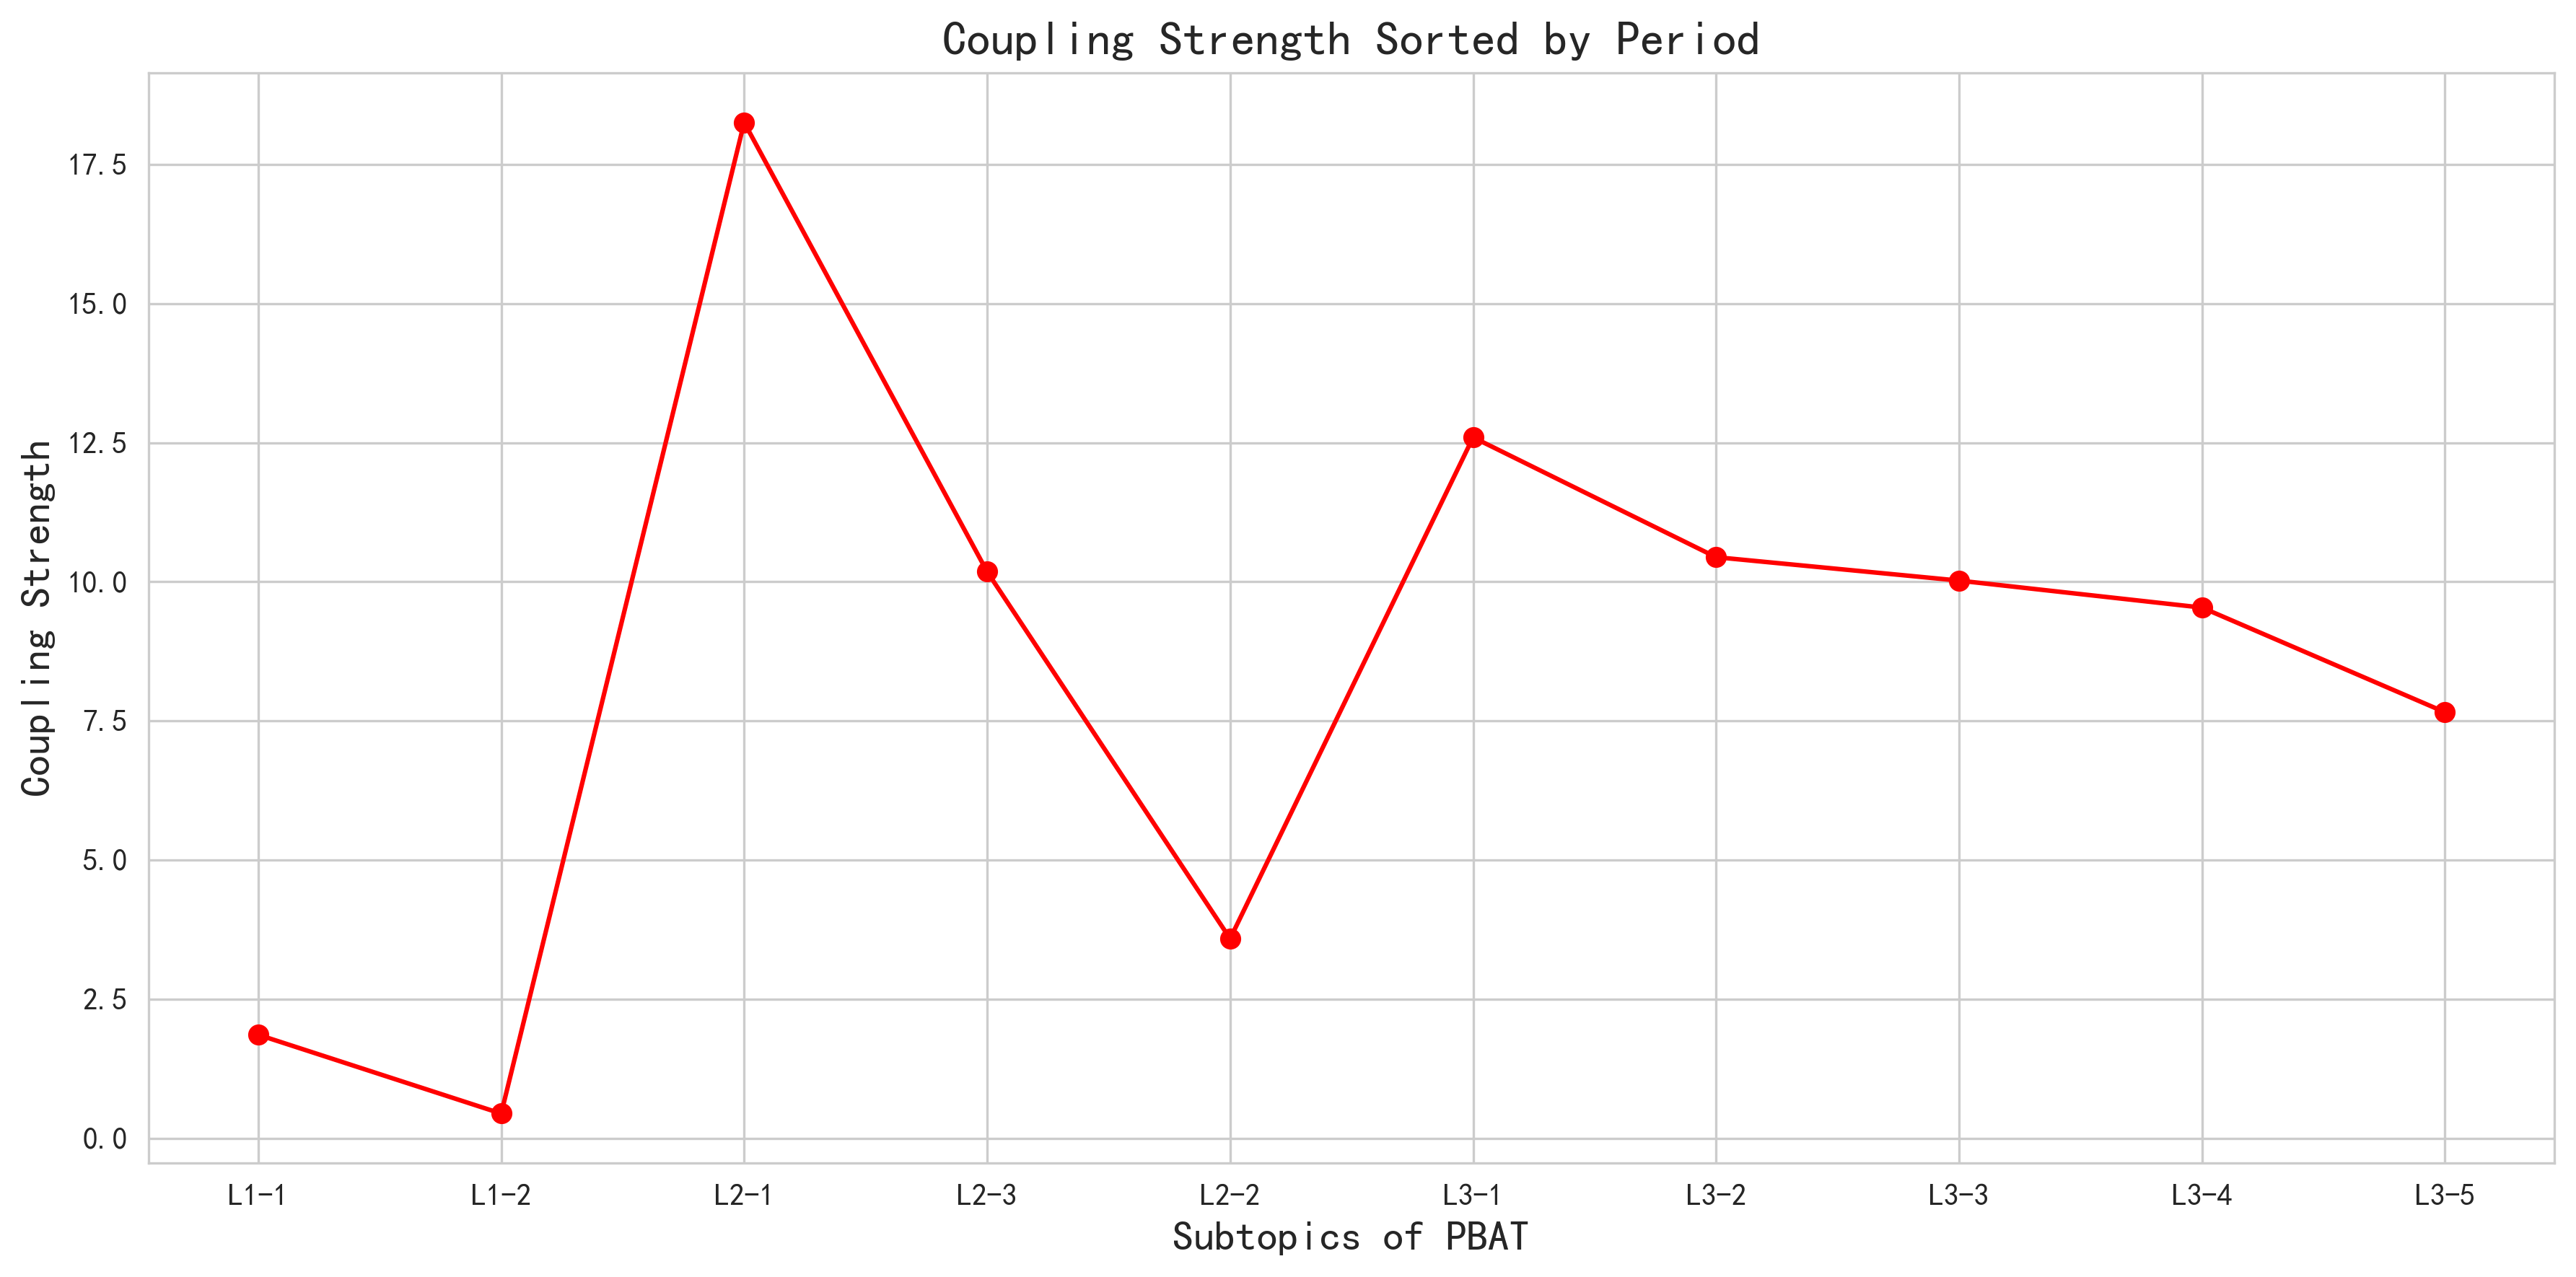

<Figure size 1920x1440 with 0 Axes>

In [91]:
import matplotlib.pyplot as plt

def prepare_coupling_data_sorted(coupling_strength_period1, coupling_strength_period2, coupling_strength_period3):
    # Sort data by strength for each period
    sorted_period1 = sorted(coupling_strength_period1.items(), key=lambda item: item[1], reverse=True)
    sorted_period2 = sorted(coupling_strength_period2.items(), key=lambda item: item[1], reverse=True)
    sorted_period3 = sorted(coupling_strength_period3.items(), key=lambda item: item[1], reverse=True)
    
    # Extract strengths and generate labels
    strengths_period1 = [item[1] for item in sorted_period1]
    labels_period1 = [f'L1-{i+1}' for i, _ in enumerate(sorted_period1)]
    
    strengths_period2 = [item[1] for item in sorted_period2]
    labels_period2 = [f'L2-{i+1}' for i, _ in enumerate(sorted_period2)]
    
    strengths_period3 = [item[1] for item in sorted_period3]
    labels_period3 = [f'L3-{i+1}' for i, _ in enumerate(sorted_period3)]
    
    # Combine all periods
    all_strengths = strengths_period1 + strengths_period2 + strengths_period3
    all_labels = labels_period1 + labels_period2 + labels_period3
    
    return all_strengths, all_labels

all_strengths, all_labels = prepare_coupling_data_sorted(coupling_strength_period1, coupling_strength_period2, coupling_strength_period3)

plt.figure(figsize=(12, 6))
plt.plot(all_labels, all_strengths, marker='o', color='red')

plt.title('Coupling Strength Sorted by Period', fontsize=16)
plt.xlabel('Subtopics of PBAT', fontsize=14)
plt.ylabel('Coupling Strength', fontsize=14)

plt.grid(True)

plt.tight_layout()
plt.show()
plt.savefig('coupling_strengths_plot.png', dpi=1000)

[(0, 14.890956396040252), (2, 8.265855861422608), (1, 2.7585436775274275)]
['L1-1', 'L1-2']


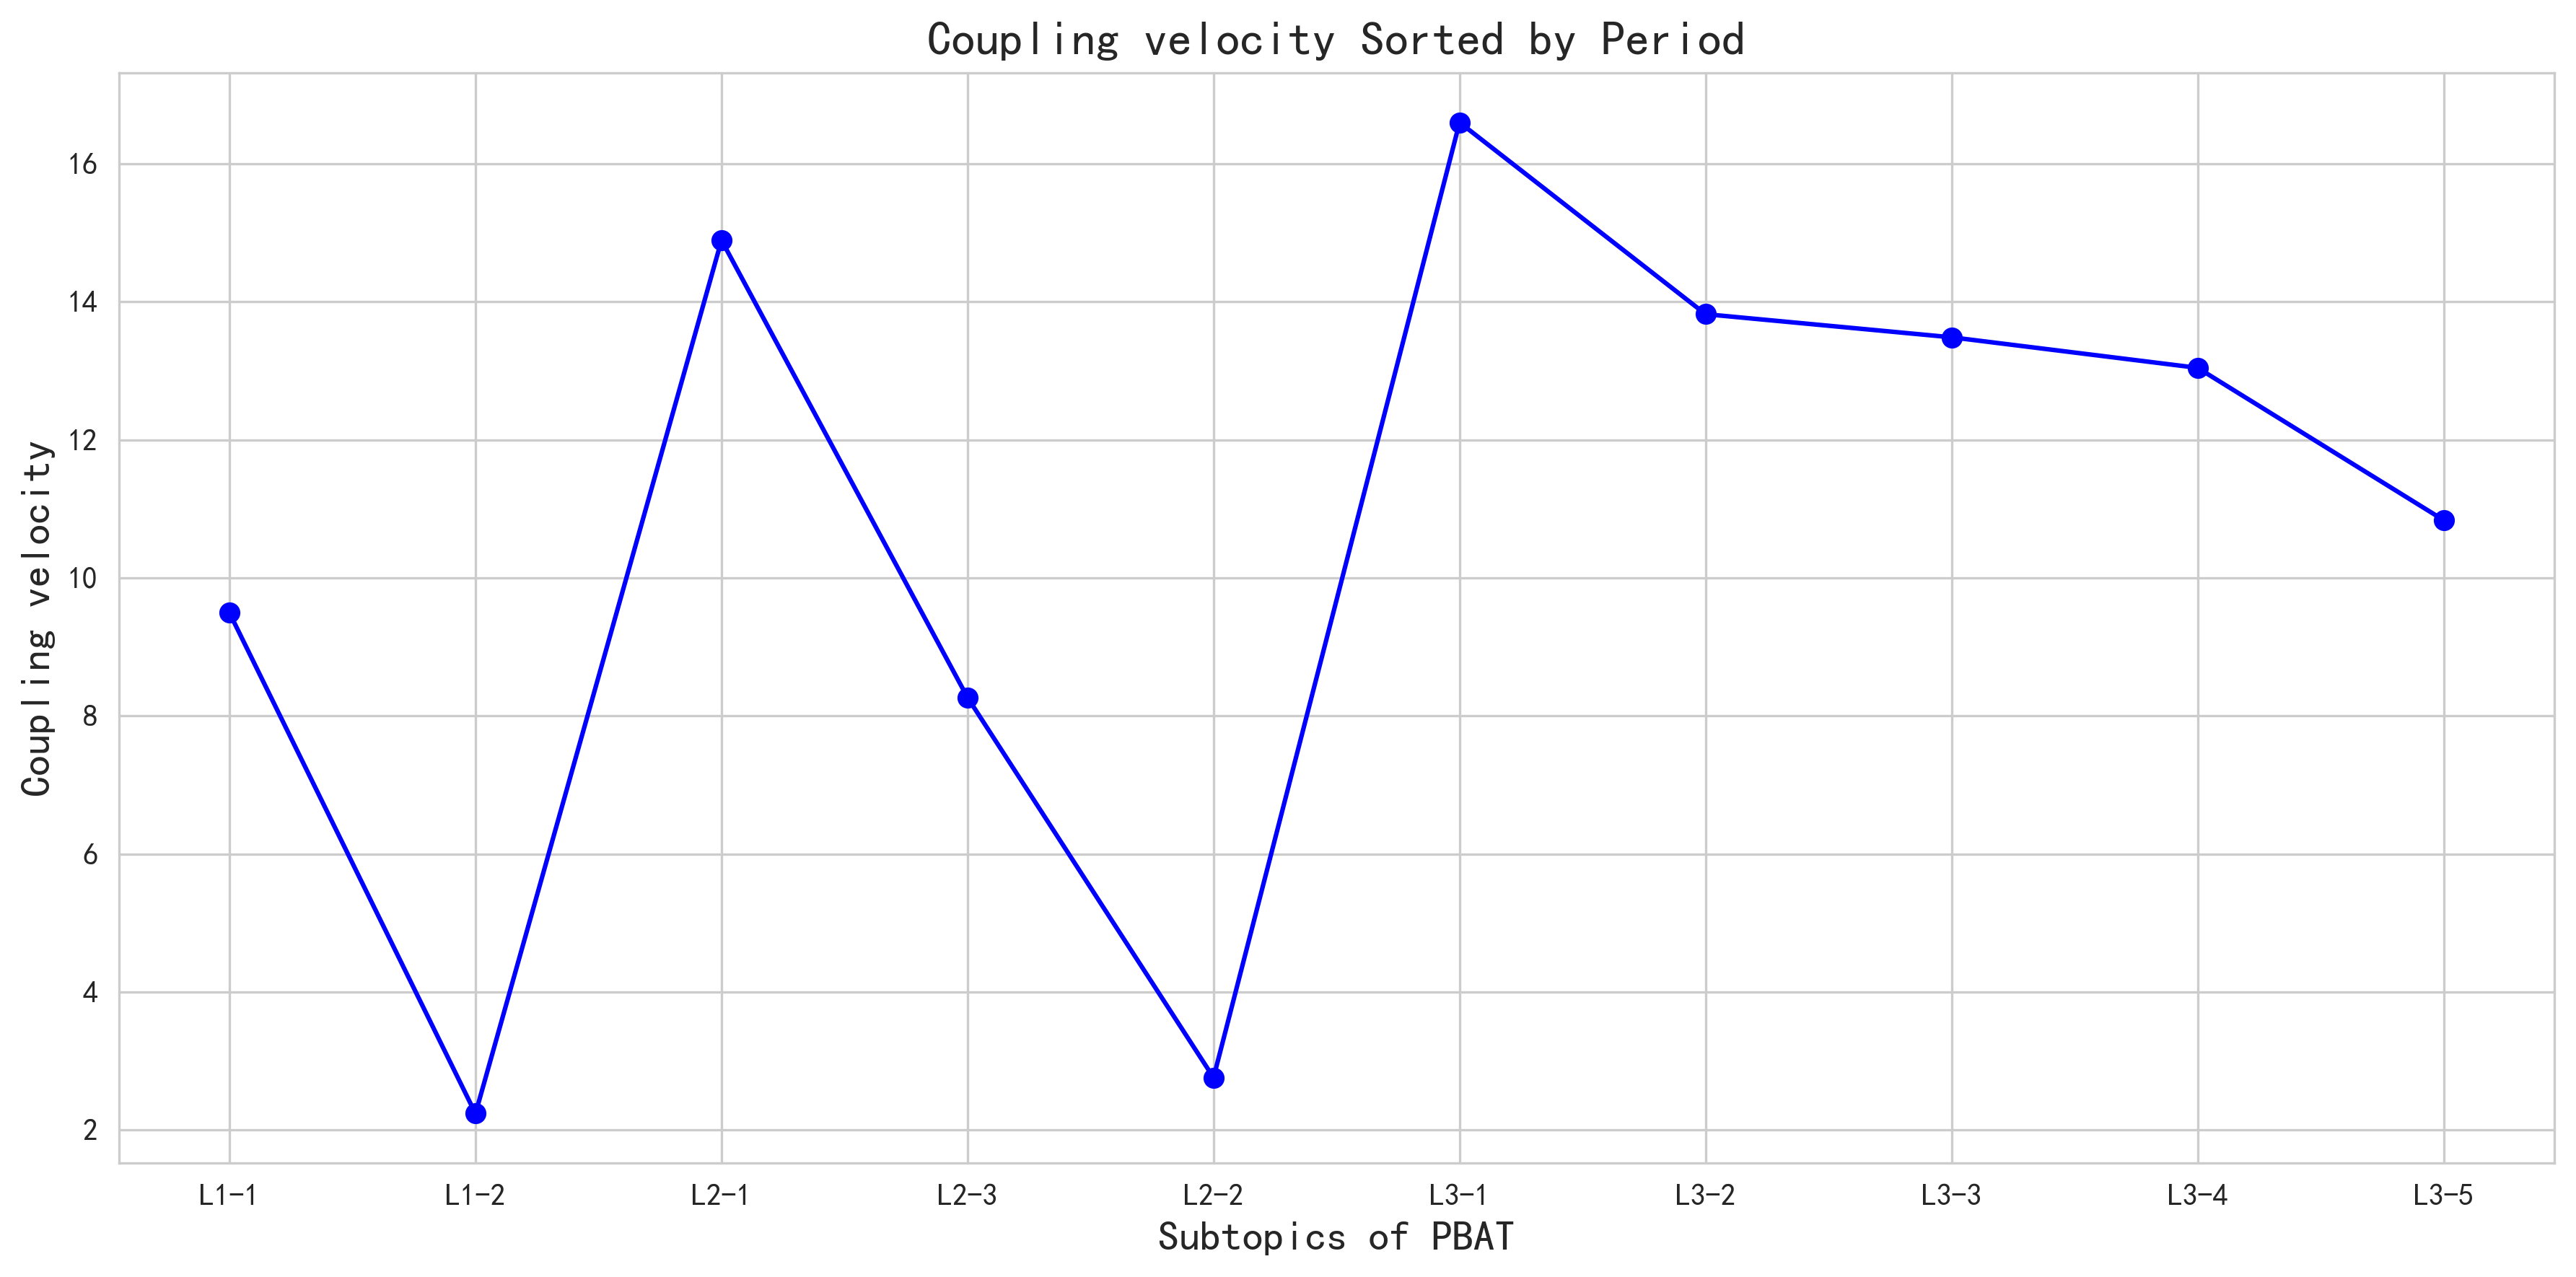

<Figure size 1920x1440 with 0 Axes>

In [92]:
all_strengths, all_labels = prepare_coupling_data_sorted(coupling_velocity_period1, coupling_velocity_period2, coupling_velocity_period3)

plt.figure(figsize=(12, 6))
plt.plot(all_labels, all_strengths, marker='o', color='blue')

plt.title('Coupling velocity Sorted by Period', fontsize=16)
plt.xlabel('Subtopics of PBAT', fontsize=14)
plt.ylabel('Coupling velocity', fontsize=14)

plt.grid(True)

plt.tight_layout()
plt.show()
plt.savefig('coupling_velocity_plot.png', dpi=1000)
